# 0.0 Business Problem

## *****Estágio atual do projeto:*****
Ciclo 4: Criar as hipóteses de negócio

## 0.1 Contexto:
A TopBank é uma grande empresa de serviços bancários. Ela atua principalmente nos países da Europa oferecendo produtos financeiros, desde contas bancárias até investimentos, passando por alguns tipos de seguros e produto de investimento.

O modelo de negócio da empresa é do tipo serviço, ou seja, ela comercializa serviços bancários para seus clientes através de agências físicas e um portal online. 

O principal produto da empresa é uma conta bancária, na qual o cliente pode depositar seu salário, fazer saques, depósitos e transferência para outras contas. Essa conta bancária não tem custo para o cliente e tem uma vigência de 12 meses, ou seja, o cliente precisa renovar o contrato dessa conta para continuar utilizando pelos próximos 12 meses.

Segundo o time de Analytics da TopBank, cada cliente que possui essa conta bancária retorna um valor monetário de 15% do valor do seu salário estimado, se esse for menor que a média e 20% se esse salário for maior que a média, durante o período vigente de sua conta. Esse valor é calculado anualmente. 

Por exemplo, se o salário mensal de um cliente é de 1.000 reais e a média de todos os salários do banco é de 800 reais. A empresa, portanto, fatura 200 reais anualmente com esse cliente. Se esse cliente está no banco há 10 anos, a empresa já faturou 2.000 reais com suas transações e utilização da conta. 

Nos últimos meses, o time de Analytics percebeu que a taxa de clientes cancelando suas contas e deixando o banco, atingiu números inéditos na empresa. Preocupados com o aumento dessa taxa, o time planejou um plano de ação para diminuir taxa de evasão de clientes.

Preocupados com a queda dessa métrica, o time de Analytics da TopBottom, contratou você como consultor de Data Science para criar um plano de ação, com o objetivo de reduzir a evasão de clientes, ou seja, impedir que o cliente cancele seu contrato e não o renove por mais 12 meses. Essa evasão, nas métricas de negócio, é conhecida como Churn.

De maneira geral, Churn é uma métrica que indica o número de clientes que cancelaram o contrato ou pararam de comprar seu produto em um determinado período de tempo. Por exemplo, clientes que cancelaram o contrato de serviço ou após o vencimento do mesmo, não renovaram, são clientes considerados em churn.

Outro exemplo seria os clientes que não fazem uma compra à mais de 60 dias. Esse clientes podem ser considerados clientes em churn até que uma compra seja realizada. O período de 60 dias é totalmente arbitrário e varia entre empresas. 

Projeto retirado do Blog Seja Um Data Scientist
https://sejaumdatascientist.com/predicao-de-churn/

Projeto original disponível na plataforma Kaggle
https://www.kaggle.com/mervetorkan/churndataset

## 0.2 Estratégia da Solução:

#### 0.2.1 Objetivos:
1. Qual a taxa atual de Churn da Top-Bank? Como ela varia mensalmente?
2. Qual a performance do modelo em classificar os clientes como churn?
3. Qual o retorno esperado, em termos de faturamento, se a empresa utilizar seu modelo para evitar o churn dos clientes?

#### 0.2.2 Proposta de Solução:
1. Definir a baseline de churn atual e qual é seu custo para a empresa, e utilizar de Exploratory Data Analysis para levantar parâmetros de timeseries para explicar o comportamento da variabilidade ao longo do tempo.
2. Escolher métrica de performance, modelar o problema e treinar.
3. Definido a baseline (problema 1), scorar os clientes, suas probabilidades de churn, definir programa de giftcards, mensurar probabilidade de conversão de clientes em churn, e custo do programa. Retorno financeiro = Churn atual - (menos) Churn predito após programa de giftcards - (menos) custo do programa.

#### 0.2.3 Inputs:
1. Problema de negócio
2. Conjunto de dados com características de 10.000 clientes e seus status de churn

#### 0.2.4 Outputs:
1. Taxas e parâmetros em uma tabela no notebook (Porcentagem, | Mês | Taxa de churn |)
3. Métricas do modelo (Métrica F1-Score)
3. Receita gerada pela redução de churn (Valor em moeda)
4. Tabela de banco de dados SQL com todas as classificações
5. API com request/predict do tipo: | v1 | v2 | v3 | - 1/0

#### 0.2.5 Ciclos:
1. Criar um pipeline de dados funcional, de ponta a ponta (desde a coleta de dados até o 
    treinamento do modelo)
2. Entender os dados e limpa-los (buscar inconsistências) Análises de estatística
    descritiva de primeira ordem
3. Feature Engineering (criar variáveis que modelam o fenômeno)
4. Criar as hipóteses de negócio
5. Análise exploratória de dados para validar ou refutar hióteses
6. Definir métricas e treinar o modelo
7. Analisar métricas
8. Resultados e conclusão

## 0.3 Significado das features:

1. RowNumber: O número da coluna
2. CustomerID: Identificador único do cliente
3. Surname: Sobrenome do cliente.
4. CreditScore: A pontuação de Crédito do cliente para o mercado de consumo.
5. Geography: O país onde o cliente reside.
6. Gender: O gênero do cliente.
7. Age: A idade do cliente.
8. Tenure: Número de anos que o cliente permaneceu ativo.
9. Balance: Valor monetário que o cliente tem em sua conta bancária.
10. NumOfProducts: O número de produtos comprado pelo cliente no banco.
11. HasCrCard: Indica se o cliente possui ou não cartão de crédito.
12. IsActiveMember: Indica se o cliente fez pelo menos uma movimentação na conta bancário dentro de 12 meses.
13. EstimateSalary: Estimativa do salário mensal do cliente.
14. Exited: Indica se o cliente está ou não em Churn.

## 0.4 Sumário:

## 0.5 Resultados e Conclusão:

# 1.0 Imports

###### 1.1 Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from scipy.stats import shapiro, ttest_ind

import pickle

import time

tempo_agora = time.time() # Contabilizando o tempo de processamento do projeto

###### 1.2 Loading dataset

In [2]:
# reading csv
df = pd.read_csv('C:\\Users\\Samoel\\My Drive\\Pessoal\\Projetos\\bank_churn_predict\\bank_churn_predict\\churn.csv')

###### 1.3 Helper functions

In [3]:
# Estatística descritiva de primeira ordem
def estat_desc(x):
    print(f'Média: {round(x.mean(), 2)}')
    print(f'Mínimo: {round(x.min(), 2)}')
    print(f'Máximo: {round(x.max(), 2)}')
    print(f'Range: {round(x.max()-x.min(), 2)}')
    print(f'Desvio Padrão: {round(x.std(), 2)}')
    print(f'Curtose: {round(x.kurtosis(), 2)}')
    print(f'Skew: {round(x.skew(), 2)}')
    
# Teste de Shapiro de normalidade
def teste_shapiro(x, alpha=0.05):
    temp = np.random.choice(df.index, 5000)
    x = x.loc[temp]
    result = shapiro(x)
    if result.pvalue < alpha:
        print(f'Com um pvalor: {result.pvalue}, a Series NÃO tem distribuição normal.')
    else:
        print(f'Com um pvalor: {result.pvalue}, a Series tem distribuição normal.')

# identificando outliers
def busca_outliers(df, series):
    q1 = np.percentile(df[series], 25)
    q3 = np.percentile(df[series], 75)
    distancia = q3 - q1
    salto = distancia * 1.5
    li = q1 - salto
    ls = q3 + salto
    indices = df[(df[series]<li)|(df[series]>ls)].index
    print(f'O limite inferior é: {li}\nO limite superior é: {ls}\nHá {len(indices)} outliers')
    return indices

# Função inferência
def comparar_features(series1, series2, confiança, qtd_amostras):
    print('Series 1')
    print(f'Média = {round(series1.mean(), 2)}')
    print(f'Desvio padrão = {round(series1.std(), 2)}')
    print()
    print('Series 2')
    print(f'Média = {round(series2.mean(), 2)}')
    print(f'Desvio padrão = {round(series2.std(), 2)}')
    aleatório1 = np.random.choice(series1.dropna(), qtd_amostras)
    aleatório2 = np.random.choice(series2.dropna(), qtd_amostras)
    stat, p = ttest_ind(aleatório1, aleatório2)
    print(f'statistic = {round(stat, 2)}, p = {round(p, 2)}')
  
    if p < confiança:
        print(f'\nCom um p-valor igual à {round(p, 2)}, as series são estatísticamente DIFERENTES com um grau de confiança de {round(100-confiança*100)}%')
    if p > confiança:
        print(f'\nCom um p-valor igual à {round(p, 2)}, as series são estatísticamente IGUAIS com um grau de confiança de {round(100-confiança*100)}%')

# 2.0 Data Description

## 2.1 General Analysis

##### 2.1.1 Main insights:

###### Exited
1. Desbalanceado, por volta de 20% de churn
2. Correlação fraca com Age e muito fraca com as demais

###### NumOfProducts
1. Clientes com 3 ou 4 produtos têm maior probabilidade de churn, com 80% e 100% de churn respectivamente.
2. Correlação fraca negativa com Balance
3. 95% dos clientes possuem 1 ou 2 produtos

###### HasCrCard
1. 70% dos clientes possuem cartão de crédito
2. Aparentemente não ajuda a modelar o fenômeno
3. Correlações muito fracas

###### IsActiveMember
1. A quantidade de clientes ativos e inativos está equilibrada
2. Membros ativos são 47% menos propensos ao churn
3. Correlações muito fracas

###### Geography
1. Mais de 50% dos clientes está na França
2. Clientes da Germany têm maior probabilidade de churn
3. Correlações muito fracas

###### Gender
1. 54% dos clientes são homens
2. Mulheres têm 34% de chance maior de churn
3. Correlações muito fracas

###### CreditScore
1. Não há faixas de CreditScore mais suscetíveis ao churn
2. Correlações muito fracas

###### Age
1. Idade mínima de 18 anos, máxima de 92, aparentemente sem erros de input
2. Média de idade de clientes em churn é de 45, já os em não churn é de 37
3. Correlação fraca com Exited
4. Cauda direita mais pesada
5. 359 outliers

###### Balance
1. Balance com valor máximo bastante mais alto do que o terceiro quartil, com primeiro quartil com cliantes com valor zerado na conta, o que sugere que haja uma quantidade grande de contas com zero de saldo.
2. Clientes com saldo zerado na conta tem probabilidade relativamente menor de churn
3. Correlação fraca com NumOfProducts
4. 36% das contas bancárias estão zeradas

###### EstimatedSalary
1. Aparentemente não ajuda a modelar o fenômeno
2. Correlações muito fracas
3. Apresenta uma contagem bastante contínua em todo o range da variância da feature, semelhante a variáveis categóricas

###### Tenure
1. Aparentemente não ajuda a modelar o fenômeno
2. Correlações muito fracas
3. Apesar das médias de churn por categoria serem relativamente diferentes, os desvios padrões colocam todas as categorias em um mesmo patamar

##### 2.1.2 Looking dataset

In [4]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


##### 2.1.3 Data dimensions

In [5]:
print(f'O dataset possui: {df.shape[0]} linhas')
print(f'O dataset possui: {df.shape[1]} colunas')

O dataset possui: 10000 linhas
O dataset possui: 14 colunas


##### 2.1.4 Datatypes

In [6]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

##### 2.1.5 Changing interesting datatypes

In [7]:
geography_le = LabelEncoder()
Geography = geography_le.fit(df['Geography'])
df['Geography_enc'] = geography_le.fit_transform(df['Geography'])
gender_le = LabelEncoder()
Gender = gender_le.fit(df['Gender'])
df['Gender_enc'] = gender_le.fit_transform(df['Gender'])

##### 2.1.6 Segregating feature types

In [8]:
features_id = ['CustomerId']
features_string = ['Gender', 'Geography', 'Surname']
features_categóricas = ['NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Geography_enc', 'Gender_enc', 'Tenure']
features_numéricas = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
target = ['Exited']

##### 2.1.7 Cheking NaN values

In [9]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
Geography_enc      0
Gender_enc         0
dtype: int64

## 2.2 Descriptive Statistics

### 2.2.1 Target

In [10]:
print(f'A taxa global de churn é: {round(df["Exited"].mean() * 100, 2)}%')

A taxa global de churn é: 20.37%


Desbalanceada

### 2.2.1 Categorical Features

In [11]:
df[features_categóricas].astype('category').describe()

,NumOfProducts,HasCrCard,IsActiveMember,Geography_enc,Gender_enc,Tenure
count,10000,10000,10000,10000,10000,10000
unique,4,2,2,3,2,11
top,1,1,1,0,1,2
freq,5084,7055,5151,5014,5457,1048


In [12]:
Geography.inverse_transform([0])

array(['France'], dtype=object)

In [13]:
Gender.inverse_transform([1])

array(['Male'], dtype=object)

Mais de 50% dos clientes possui apenas 1 produto, 70% dos clientes possuel cartão de crédito, 50% dos clientes é da França.

### 2.2.1 Numerical Features

In [14]:
df[features_numéricas].describe()

,CreditScore,Age,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,76485.889288,100090.239881
std,96.653299,10.487806,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,11.580000
25%,584.000000,32.000000,0.000000,51002.110000
50%,652.000000,37.000000,97198.540000,100193.915000
75%,718.000000,44.000000,127644.240000,149388.247500
max,850.000000,92.000000,250898.090000,199992.480000


Range de idade entre 18 e 92 anos, mais de 25% das contas tem saldo zero.

# 3.0 Feature Engineering

#### 3.1 Age Transformada por Log

In [15]:
df['Log_Age'] = df['Age'].apply(lambda x: np.log(x) if x>0 else 0)

<AxesSubplot:xlabel='Log_Age', ylabel='Count'>

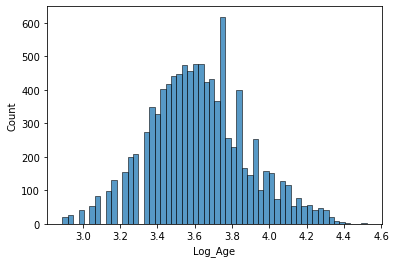

In [16]:
sns.histplot(df['Log_Age'])

In [17]:
teste_shapiro(df['Log_Age'], 0.05)

Com um pvalor: 1.3424171171373678e-13, a Series NÃO tem distribuição normal.


In [18]:
estat_desc(df['Log_Age'])

Média: 3.63
Mínimo: 2.89
Máximo: 4.52
Range: 1.63
Desvio Padrão: 0.26
Curtose: 0.15
Skew: 0.18


In [19]:
indices = busca_outliers(df, 'Log_Age')

O limite inferior é: 2.988055306121925
O limite superior é: 4.261870230596063
Há 182 outliers


#### 3.2 Média de churn por categoria de Tenure

In [20]:
temp = df.groupby('Tenure').mean()['Exited']
df['Tenure_Exited_Mean'] = df['Tenure'].map(temp)

In [21]:
df[['Tenure_Exited_Mean', 'Exited']].corr()

,Tenure_Exited_Mean,Exited
Tenure_Exited_Mean,1.000000,0.037283
Exited,0.037283,1.000000


Aparentemente não ajuda a modelar o evento

# 4.0 Business Hypothesis

#### 4.1 

# 5.0 Exploratory Data Analysis

### 5.1 Features Analysis

#### Exited

###### Principais Insights:
1. Desbalanceado, por volta de 20% de churn
2. Correlação fraca com Age e muito fraca com as demais

###### General Analysis

In [22]:
df.corr()['Exited'].sort_values(ascending=False)[1:]

Log_Age               0.294082
Age                   0.285323
Balance               0.118533
Tenure_Exited_Mean    0.037283
Geography_enc         0.035943
EstimatedSalary       0.012097
CustomerId           -0.006248
HasCrCard            -0.007138
Tenure               -0.014001
RowNumber            -0.016571
CreditScore          -0.027094
NumOfProducts        -0.047820
Gender_enc           -0.106512
IsActiveMember       -0.156128
Name: Exited, dtype: float64

Correlação fraca com Age

In [23]:
df['Exited'].mean()

0.2037

Target desbalanceada, serão necessárias ferramentas de balanceamento e métricas para dados desbalanceados

#### Age

###### Principais Insights:
1. Idade mínima de 18 anos, máxima de 92, aparentemente sem erros de input
2. Média de idade de clientes em churn é de 45, já os em não churn é de 37
3. Correlação fraca com Exited
4. Idade mínima de 18 anos, máxima de 92, aparentemente sem erros de input
5. Não tem distribuição normal
6. Cauda direita mais pesada
7. 359 outliers

###### General Analysis

In [24]:
df.corr()['Age'].sort_values(ascending=False)[1:]

Log_Age               0.982680
Exited                0.285323
IsActiveMember        0.085472
Balance               0.028308
Tenure_Exited_Mean    0.026586
Geography_enc         0.022812
CustomerId            0.009497
RowNumber             0.000783
CreditScore          -0.003965
EstimatedSalary      -0.007201
Tenure               -0.009997
HasCrCard            -0.011721
Gender_enc           -0.027544
NumOfProducts        -0.030680
Name: Age, dtype: float64

Correlação fraca com Exited

<AxesSubplot:xlabel='Age', ylabel='Count'>

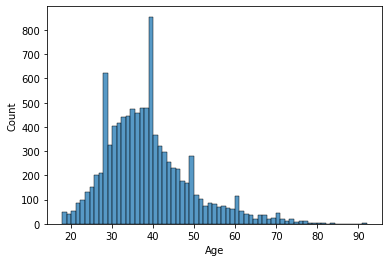

In [25]:
sns.histplot(df['Age'])

In [26]:
estat_desc(df['Age'])

Média: 38.92
Mínimo: 18
Máximo: 92
Range: 74
Desvio Padrão: 10.49
Curtose: 1.4
Skew: 1.01


In [27]:
teste_shapiro(df['Age'], 0.05)

Com um pvalor: 1.118460382285496e-40, a Series NÃO tem distribuição normal.


In [28]:
indices = busca_outliers(df, 'Age')

O limite inferior é: 14.0
O limite superior é: 62.0
Há 359 outliers


###### Correlação com a target

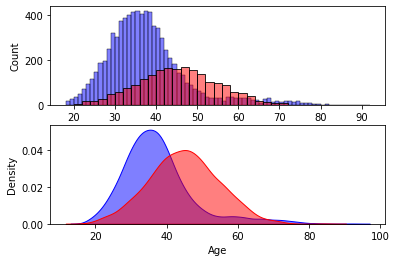

In [29]:
plt.subplot(2, 1, 1)
g = sns.histplot(df.loc[df['Exited']==0, 'Age'], color='b', alpha=0.5)
g = sns.histplot(df.loc[df['Exited']==1, 'Age'], color='r', alpha=0.5)
plt.subplot(2, 1, 2)
g = sns.kdeplot(df.loc[df['Exited']==0, 'Age'], color='b', alpha=0.5, shade=True)
g = sns.kdeplot(df.loc[df['Exited']==1, 'Age'], color='r', alpha=0.5, shade=True)

Aparentemente a média de idade de clientes que não estão em churn é por volta dos 37 anos, e os clientes em churn por volta de 45 anos.

In [30]:
print(f'Média de idade de clientes em NÃO churn: {round(df.loc[df["Exited"]==0, "Age"].mean())}')
print(f'Média de idade de clientes em churn: {round(df.loc[df["Exited"]==1, "Age"].mean())}')

Média de idade de clientes em NÃO churn: 37
Média de idade de clientes em churn: 45


#### Balance

###### Principais Insights:
1. Clientes com saldo zerado na conta tem probabilidade relativamente menor de churn
2. Correlação fraca com NumOfProducts
3. 36% das contas bancárias estão zeradas
4. Não tem distribuição normal

###### General Analysis

In [31]:
df.corr()['Balance'].sort_values(ascending=False)[1:]

Exited                0.118533
Geography_enc         0.069408
Log_Age               0.030598
Age                   0.028308
EstimatedSalary       0.012797
Gender_enc            0.012087
Tenure_Exited_Mean    0.010074
CreditScore           0.006268
RowNumber            -0.009067
IsActiveMember       -0.010084
Tenure               -0.012254
CustomerId           -0.012419
HasCrCard            -0.014858
NumOfProducts        -0.304180
Name: Balance, dtype: float64

Correlação fraca com NumOfProducts

In [32]:
estat_desc(df['Balance'])

Média: 76485.89
Mínimo: 0.0
Máximo: 250898.09
Range: 250898.09
Desvio Padrão: 62397.41
Curtose: -1.49
Skew: -0.14


<AxesSubplot:xlabel='Balance', ylabel='Count'>

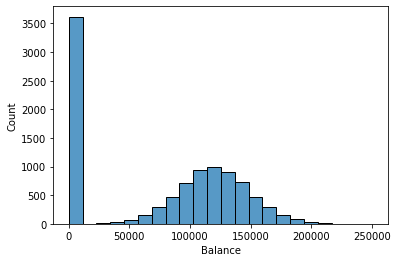

In [33]:
sns.histplot(df['Balance'])

In [34]:
df['Balance'].value_counts(normalize=True).head(5)

0.00         0.3617
130170.82    0.0002
105473.74    0.0002
85304.27     0.0001
159397.75    0.0001
Name: Balance, dtype: float64

36% das contas bancárias estão zeradas

In [35]:
teste_shapiro(df['Balance'])

Com um pvalor: 0.0, a Series NÃO tem distribuição normal.


In [36]:
indices = busca_outliers(df, 'Balance')

O limite inferior é: -191466.36000000002
O limite superior é: 319110.60000000003
Há 0 outliers


###### Correlação com a target

<AxesSubplot:xlabel='Balance', ylabel='Density'>

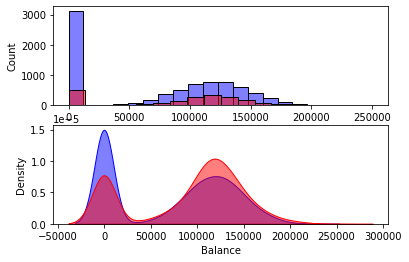

In [37]:
plt.subplot(2, 1, 1)
sns.histplot(df.loc[df['Exited']==0, 'Balance'], color='b', alpha=0.5)
sns.histplot(df.loc[df['Exited']==1, 'Balance'], color='r', alpha=0.5)
plt.subplot(2, 1, 2)
sns.kdeplot(df.loc[df['Exited']==0, 'Balance'], color='b', alpha=0.5, shade=True)
sns.kdeplot(df.loc[df['Exited']==1, 'Balance'], color='r', alpha=0.5, shade=True)

Aparentemente os clientes que têm algum dinheiro na sua conta bancária tem uma probabilidade relativamente maior de churn

In [38]:
print(f'Média de Balance entre clientes em NÃO churn {round(df.loc[df["Exited"]==0, "Balance"].mean(), 2)}')
print(f'Média de Balance entre clientes em churn {round(df.loc[df["Exited"]==1, "Balance"].mean(), 2)}')

Média de Balance entre clientes em NÃO churn 72745.3
Média de Balance entre clientes em churn 91108.54


#### Geography

###### Principais Insights:
1. Mais de 50% dos clientes está na França
2. Clientes da Germany têm maior probabilidade de Churn
3. Correlações muito fracas

###### General Analysis

In [39]:
df.corr()['Geography_enc'].sort_values(ascending=False)[1:]

Balance               0.069408
Exited                0.035943
Log_Age               0.024125
Age                   0.022812
CreditScore           0.007888
IsActiveMember        0.006724
CustomerId            0.006516
Gender_enc            0.004719
NumOfProducts         0.003972
Tenure                0.003739
EstimatedSalary      -0.001369
Tenure_Exited_Mean   -0.002868
HasCrCard            -0.008523
RowNumber            -0.010358
Name: Geography_enc, dtype: float64

Correlações muito fracas

<AxesSubplot:xlabel='Geography_enc', ylabel='count'>

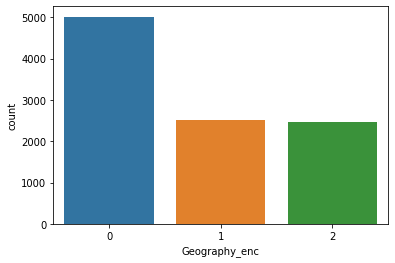

In [40]:
sns.countplot(x='Geography_enc', data=df)

###### Correlação com a target

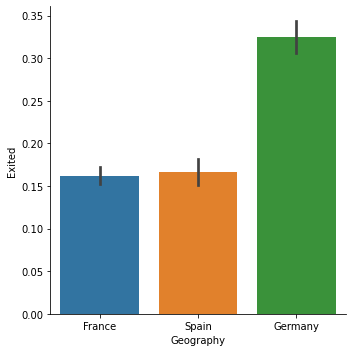

In [41]:
sns.catplot(x='Geography', y='Exited', data=df, kind='bar')

Clientes da Germany têm maior probabilidade de Churn

#### CreditScore

###### Principais Insights:
1. Não tem distribuição normal
2. Não há faixas de CreditScore mais suscetíveis ao churn
3. Correlações muito fracas

###### General Analysis

In [42]:
df.corr()['CreditScore'].sort_values(ascending=False)[1:]

IsActiveMember        0.025651
NumOfProducts         0.012238
Geography_enc         0.007888
Balance               0.006268
RowNumber             0.005840
CustomerId            0.005308
Tenure_Exited_Mean    0.004229
Tenure                0.000842
EstimatedSalary      -0.001384
Gender_enc           -0.002857
Age                  -0.003965
HasCrCard            -0.005458
Log_Age              -0.006507
Exited               -0.027094
Name: CreditScore, dtype: float64

Correlações muito fracas

<AxesSubplot:xlabel='CreditScore', ylabel='Count'>

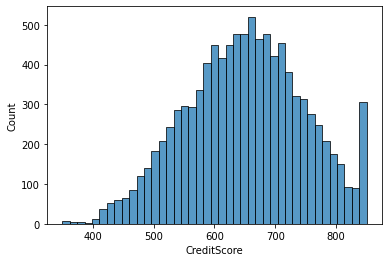

In [43]:
sns.histplot(df['CreditScore'])

Há um teto máximo de score

In [44]:
estat_desc(df['CreditScore'])

Média: 650.53
Mínimo: 350
Máximo: 850
Range: 500
Desvio Padrão: 96.65
Curtose: -0.43
Skew: -0.07


In [45]:
indices = busca_outliers(df, 'CreditScore')

O limite inferior é: 383.0
O limite superior é: 919.0
Há 15 outliers


Outliers somente no início da distribuição

In [46]:
teste_shapiro(df['CreditScore'])

Com um pvalor: 3.435251893059779e-14, a Series NÃO tem distribuição normal.


###### Correlação com a target

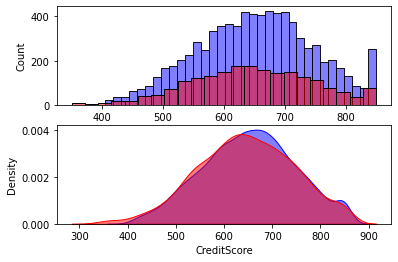

In [47]:
plt.subplot(2, 1, 1)
g = sns.histplot(df.loc[df['Exited']==0, 'CreditScore'], alpha=0.5, color='b')
g = sns.histplot(df.loc[df['Exited']==1, 'CreditScore'], alpha=0.5, color='r')
plt.subplot(2, 1, 2)
g = sns.kdeplot(df.loc[df['Exited']==0, 'CreditScore'], alpha=0.5, color='b', shade=True)
g = sns.kdeplot(df.loc[df['Exited']==1, 'CreditScore'], alpha=0.5, color='r', shade=True)

Não há faixas de CreditScore mais suscetíveis ao churn

#### Tenure

###### Principais Insights:
1. Aparentemente não ajuda a modelar o fenômeno
2. Correlações muito fracas
3. Apesar das médias de churn por categoria serem relativamente diferentes, os desvios padrões colocam todas as categorias em um mesmo patamar

###### General Analysis

In [48]:
df.corr()['Tenure'].sort_values(ascending=False)[1:]

HasCrCard             0.022583
Gender_enc            0.014733
NumOfProducts         0.013444
EstimatedSalary       0.007784
Geography_enc         0.003739
CreditScore           0.000842
RowNumber            -0.006495
Age                  -0.009997
Log_Age              -0.011199
Balance              -0.012254
Exited               -0.014001
CustomerId           -0.014883
IsActiveMember       -0.028362
Tenure_Exited_Mean   -0.375521
Name: Tenure, dtype: float64

Correlações muito fracas

In [49]:
df['Tenure'].max()

10

<AxesSubplot:xlabel='Tenure', ylabel='count'>

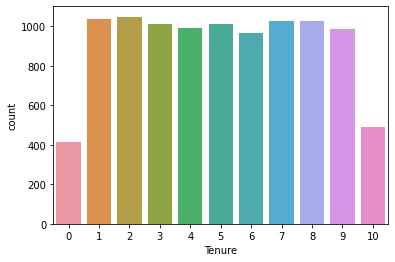

In [50]:
sns.countplot(x='Tenure', data=df)

In [51]:
df['Tenure'].value_counts(normalize=True)

2     0.1048
1     0.1035
7     0.1028
8     0.1025
5     0.1012
3     0.1009
4     0.0989
9     0.0984
6     0.0967
10    0.0490
0     0.0413
Name: Tenure, dtype: float64

###### Correlação com a target

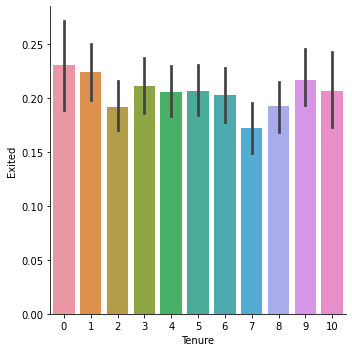

In [52]:
sns.catplot(x='Tenure', y='Exited', data=df, kind='bar')

Apesar das médias serem relativamente diferentes, os desvios padrões colocam todas as categorias em um mesmo patamar

#### NumOfProducts

###### Principais Insights:
1. Clientes com 3 ou 4 produtos têm maior probabilidade de churn, com 80% e 100% de churn respectivamente.
2. Correlação fraca negativa com Balance
3. 95% dos clientes possuem 1 ou 2 produtos

###### General Analysis

In [53]:
df.corr()['NumOfProducts'].sort_values(ascending=False)[1:]

CustomerId            0.016972
EstimatedSalary       0.014204
Tenure                0.013444
CreditScore           0.012238
IsActiveMember        0.009612
RowNumber             0.007246
Geography_enc         0.003972
HasCrCard             0.003183
Gender_enc           -0.021859
Tenure_Exited_Mean   -0.026026
Log_Age              -0.030025
Age                  -0.030680
Exited               -0.047820
Balance              -0.304180
Name: NumOfProducts, dtype: float64

Correlação fraca negativa com Balance

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

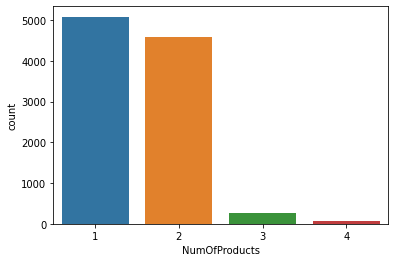

In [54]:
sns.countplot(x='NumOfProducts', data=df)

In [55]:
df['NumOfProducts'].value_counts(normalize=True)

1    0.5084
2    0.4590
3    0.0266
4    0.0060
Name: NumOfProducts, dtype: float64

95% dos clientes possuem 1 ou 2 produtos

###### Correlação com a target

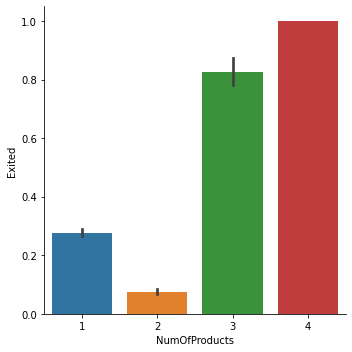

In [56]:
sns.catplot(x='NumOfProducts', y='Exited', data=df, kind='bar')

In [57]:
df.loc[df['NumOfProducts']==4, 'Exited'].sum()

60

In [58]:
df.loc[df['NumOfProducts']==3, 'Exited'].sum()

220

Clientes com 3 ou 4 produtos tem maior probabilidade de churn. O churn para clientes com 4 produtos é de 100%, com um total de 60 clientes, e com 3 produtos de 80% com um total de 220 clientes.

#### HasCrCard

###### Principais Insights:
1. 70% dos clientes possui cartão de crédito
2. Aparentemente não ajuda a modelar o fenômeno
3. Correlações muito fracas

###### General Analysis

In [59]:
df.corr()['HasCrCard'].sort_values(ascending=False)[1:]

Tenure                0.022583
Gender_enc            0.005766
NumOfProducts         0.003183
RowNumber             0.000599
CreditScore          -0.005458
Exited               -0.007138
Geography_enc        -0.008523
EstimatedSalary      -0.009933
Log_Age              -0.011659
Age                  -0.011721
IsActiveMember       -0.011866
CustomerId           -0.014025
Balance              -0.014858
Tenure_Exited_Mean   -0.019604
Name: HasCrCard, dtype: float64

Correlações muito fracas

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

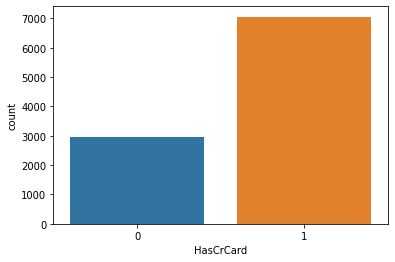

In [60]:
sns.countplot(x='HasCrCard', data=df)

In [61]:
df['HasCrCard'].value_counts(normalize=True)

1    0.7055
0    0.2945
Name: HasCrCard, dtype: float64

###### Correlação com a target

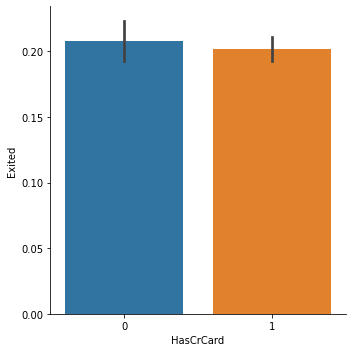

In [62]:
sns.catplot(x='HasCrCard', y='Exited', data=df, kind='bar')

Iguais

#### IsActiveMember

###### Principais Insights:
1. A quantidade de clientes ativos e inativos está equilibrada
2. Membros ativos são 47% menos propensos ao churn
3. Correlações muito fracas

###### General Analysis

In [63]:
df.corr()['IsActiveMember'].sort_values(ascending=False)[1:]

Age                   0.085472
Log_Age               0.064891
CreditScore           0.025651
Gender_enc            0.022544
RowNumber             0.012044
NumOfProducts         0.009612
Geography_enc         0.006724
CustomerId            0.001665
Tenure_Exited_Mean    0.001279
Balance              -0.010084
EstimatedSalary      -0.011421
HasCrCard            -0.011866
Tenure               -0.028362
Exited               -0.156128
Name: IsActiveMember, dtype: float64

Correlações muito fracas

###### Correlação com a target

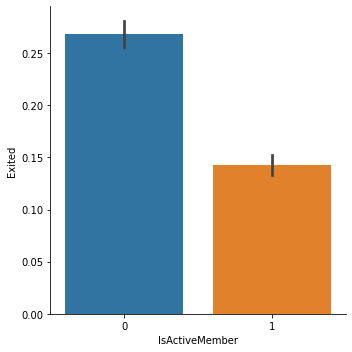

In [64]:
sns.catplot(x='IsActiveMember', y='Exited', data=df, kind='bar')

In [65]:
print(f'Os membros NÃO ativos taxa: {round(df.loc[df["IsActiveMember"]==0, "Exited"].mean()*100, 2)}% de churn')
print(f'Os membros ativos taxa: {round(df.loc[df["IsActiveMember"]==1, "Exited"].mean()*100, 2)}% de churn')

Os membros NÃO ativos taxa: 26.85% de churn
Os membros ativos taxa: 14.27% de churn


In [66]:
(26.85-14.27)/26.85

0.4685288640595904

Diferença significativa

#### EstimatedSalary

###### Principais Insights:
1. Aparentemente não ajuda a modelar o fenômeno
2. Correlações muito fracas
3. Apresenta uma frequência bastante contínua em todo o range da variância da feature, semelhante a features categóricas
4. Não parece ajudar a modelar o fenômeno

###### General Analysis

In [67]:
df.corr()['EstimatedSalary'].sort_values(ascending=False)[1:]

CustomerId            0.015271
NumOfProducts         0.014204
Balance               0.012797
Exited                0.012097
Tenure                0.007784
Geography_enc        -0.001369
CreditScore          -0.001384
Tenure_Exited_Mean   -0.001589
RowNumber            -0.005988
Log_Age              -0.006253
Age                  -0.007201
Gender_enc           -0.008112
HasCrCard            -0.009933
IsActiveMember       -0.011421
Name: EstimatedSalary, dtype: float64

Correlações muito fracas

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Count'>

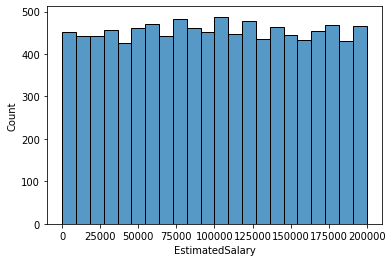

In [68]:
sns.histplot(df['EstimatedSalary'])

Inesperado, a distribuição esperada era uma Gaussiana ou algo parecido

###### Correlação com a target

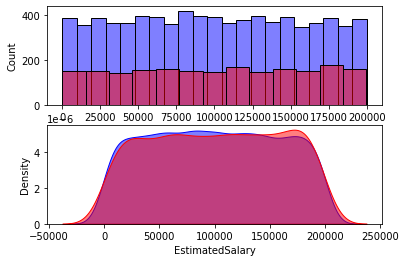

In [69]:
plt.subplot(2, 1, 1)
g = sns.histplot(df.loc[df['Exited']==0, 'EstimatedSalary'], color='b', alpha=0.5)
g = sns.histplot(df.loc[df['Exited']==1, 'EstimatedSalary'], color='r', alpha=0.5)
plt.subplot(2, 1, 2)
g = sns.kdeplot(df.loc[df['Exited']==0, 'EstimatedSalary'], color='b', alpha=0.5, shade=True)
g = sns.kdeplot(df.loc[df['Exited']==1, 'EstimatedSalary'], color='r', alpha=0.5, shade=True)

Não parece ajudar a modelar o fenômeno

#### Gender

###### Principais Insights:
1. 54% dos clientes são homens
2. Mulheres têm 34% de chance maior de churn de churn
3. Correlações muito fracas

###### General Analysis

In [70]:
df.corr()['Gender_enc'].sort_values(ascending=False)[1:]

IsActiveMember        0.022544
RowNumber             0.018196
Tenure                0.014733
Balance               0.012087
HasCrCard             0.005766
Geography_enc         0.004719
CustomerId           -0.002641
CreditScore          -0.002857
EstimatedSalary      -0.008112
Tenure_Exited_Mean   -0.010232
NumOfProducts        -0.021859
Log_Age              -0.027395
Age                  -0.027544
Exited               -0.106512
Name: Gender_enc, dtype: float64

<AxesSubplot:xlabel='Gender', ylabel='count'>

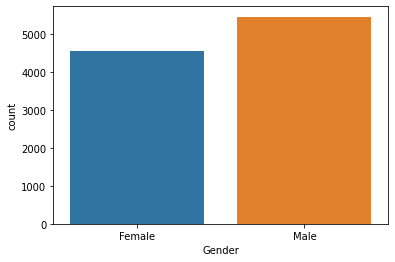

In [71]:
sns.countplot(x='Gender', data=df)

Equilibrada

###### Correlação com a target

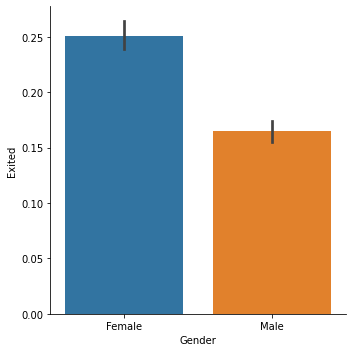

In [72]:
sns.catplot(x='Gender', y='Exited', data=df, kind='bar')

In [73]:
print(f'Mulheres apresentam: {round(df.loc[df["Gender"]=="Female", "Exited"].mean() * 100, 2)}% de churn')
print(f'Homens apresentam: {round(df.loc[df["Gender"]=="Male", "Exited"].mean() * 100, 2)}% de churn')

Mulheres apresentam: 25.07% de churn
Homens apresentam: 16.46% de churn


In [74]:
(25.07 - 16.46)/25.07

0.34343837255684084

### 5.2 Sample Space

# 6.0 Exporting Data

In [75]:
pickle.dump(df, open('C://Users//Samoel//My Drive//Pessoal//Projetos//bank_churn_predict//bank_churn_predict//exportings//df_to_data_preparation.pkl', 'wb'))

# Time

In [76]:
print(f'O tempo de processamento do projeto foi de: {int(round(time.time()-tempo_agora, 2)/60)} minutos')

O tempo de processamento do projeto foi de: 0 minutos
